In [3]:
# estamos

## PARTE 1: ANALIZANDO LA BASE

In [4]:
import os  
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import statsmodels.api as sm     
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import plot_roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay


In [5]:
#Bases Tizi
#base_04_sucia = pd.read_stata(r"C:\Users\tizip\OneDrive\Documentos\Tizi UdeSA\8- Ciencia de datos\Compu nueva\CC408-T1-4\TP3\Individual_t104.dta")
#base_24_sucia = pd.read_excel(r"C:\Users\tizip\OneDrive\Documentos\Tizi UdeSA\8- Ciencia de datos\Compu nueva\CC408-T1-4\TP3\usu_individual_T124.xlsx")

In [6]:
# Base Angie
base_04_sucia = pd.read_stata(r'/Users/angelanavajas/Desktop/Ciencia de datos/CC408-T1-4/TP3/Individual_t104.dta')
base_24_sucia = pd.read_excel(r'/Users/angelanavajas/Desktop/Ciencia de datos/CC408-T1-4/TP3/usu_individual_T124.xlsx')

#### PUNTO 2.A 
Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires, y unan ambos trimestres en una sola base.

In [7]:
# me quedo solo con los valores de CABA y GBA
base_04_filtrada = base_04_sucia.loc[base_04_sucia['aglomerado'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])]
base_24_filtrada = base_24_sucia.loc[base_24_sucia['AGLOMERADO'].isin([32, 33])]

In [8]:
# Obtener los nombres de las variables
nombres_variables04 = base_04_sucia.columns.tolist()
print(nombres_variables04)

# Obtener los nombres de las variables
nombres_variables24 = base_24_filtrada.columns.tolist()
print(nombres_variables24)

#Para poder unir sin problema, me aseguro que als variables esten en el mismo formato
base_04_filtrada.columns = base_04_filtrada.columns.str.lower()
base_24_filtrada.columns = base_24_filtrada.columns.str.lower()

# veo si cambio
nombres_variables24 = base_24_filtrada.columns.tolist()
print(nombres_variables24)

['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08j2', 'pp08j3', '

In [9]:
# concateno las bases
base_prelimpieza = pd.concat([base_24_filtrada, base_04_filtrada])
print(base_prelimpieza.columns.tolist())

['codusu', 'ano4', 'trimestre', 'nro_hogar', 'componente', 'h15', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch05', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'imputa', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp

Las variables que vamos a usar son:
- CH04: Sexo
- CH06: Años
- CH07: Estado civil 
- CH08: Estado cobertura médica
- NIVEL_ED: Nivel educativo 
- ESTADO: Condicion de actividad
- CAT_INAC: Categoria de inactividad
- IPCF: Monto de ingreso per cápita familiar percibido en el mes de referencia

In [10]:
# como hay datos que tienen distintas etiquetas en las dos bases que concatenamos, tenemos que  renombrar las etiquetas de una de las bases asi se pueden tener todos los datos con el mismo valor
variables_interes = base_prelimpieza[["ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado", "cat_inac", "componente", "h15", "mas_500", "aglomerado", "ch03"]]

for i in variables_interes:
    if i == "ch04": 
        base_prelimpieza['ch04'] = base_prelimpieza['ch04'].replace({
            'Mujer': 2,
            'Varón': 1})
    elif i == "ch06":
        base_prelimpieza['ch06'] = base_prelimpieza['ch06'].replace({
            '98 y más años' : 98, 
            'Menos de 1 año' : 0})
        # cambio el formato de los valores de esta columna porque la mitad estaba en float y la mitas en int
        base_prelimpieza['ch06'] = base_prelimpieza['ch06'].astype(int)
    elif i == "ch07":
        base_prelimpieza['ch07'] = base_prelimpieza['ch07'].replace({
            'Unido': 1, 
            'Casado': 2, 
            'Separado o divorciado': 3, 
            'Viudo': 4, 
            'Soltero': 5})
    elif i == "ch08":
        base_prelimpieza['ch08'] = base_prelimpieza['ch08'].replace({
            'Obra social (incluye PAMI)': 1,  
            'Mutual/Prepaga/Servicio de emergencia': 2,  
            'Planes y seguros públicos': 3,  
            'No paga ni le descuentan': 4,  
            'Ns./Nr.': 9,  
            'Obra social y mutual/prepaga/servicio de emergencia': 12,  
            'Obra social y planes y seguros públicos': 13,  
            'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 23,
            'Obra Social, mutual/prepaga/servicio de emergencia y planes y seguros públicos': 123})
    elif i == "nivel_ed":
        base_prelimpieza['nivel_ed'] = base_prelimpieza['nivel_ed'].replace({
            'Primaria Incompleta (incluye educación especial)': 1,  
            'Primaria Completa': 2,  
            'Secundaria Incompleta': 3,  
            'Secundaria Completa': 4,  
            'Superior Universitaria Incompleta': 5,  
            'Superior Universitaria Completa': 6, 
            'Sin instrucción': 7,  
            'Ns./Nr.': 9})
    elif i == "estado":
        base_prelimpieza['estado'] = base_prelimpieza['estado'].replace({
            'Ocupado': 1,  
            'Desocupado': 2,  
            'Inactivo': 3,  
            'Menor de 10 años': 4,  
            'Entrevista individual no realizada (no respuesta al cuestion': 0})
    elif i == "cat_inac":
        base_prelimpieza['cat_inac'] = base_prelimpieza['cat_inac'].replace({
            0.0 : 0,
            'Jubilado/pensionado': 1,  
            'Rentista': 2,  
            'Estudiante': 3,  
            'Ama de casa': 4,  
            'Menor de 6 años': 5,  
            'Discapacitado': 6,  
            'Otros': 7})
    elif i == "componente":
        base_prelimpieza['componente'] = base_prelimpieza['componente'].replace({
            'Servicio doméstico en hogares': 51})
        base_prelimpieza['componente'] = base_prelimpieza['componente'].astype(int)
    elif i == "h15":
        base_prelimpieza['h15'] = base_prelimpieza['h15'].replace({
            "Sí": 1,
            "No": 2})
        base_prelimpieza['h15'] = base_prelimpieza['h15'].astype(int)
    elif i == "mas_500":
        base_prelimpieza['mas_500'] = base_prelimpieza['mas_500'].replace({
            'N' : 1,
            'S' : 0})
    elif i == "aglomerado":
        base_prelimpieza['aglomerado'] = base_prelimpieza['aglomerado'].replace({
            'Ciudad de Buenos Aires' : 32,
            'Partidos del GBA' : 33})
    elif i == "ch03":
        base_prelimpieza['ch03'] = base_prelimpieza['ch03'].replace({
            'Jefe' : 1,
            'Cónyuge/Pareja' : 2,
            'Hijo/Hijastro' : 3,
            'Yerno/Nuera' : 4,
            'Nieto' : 5,
            'Madre/Padre' : 6,
            'Suegro' : 7,
            'Hermano' : 8,
            'Otros familiares' : 9,
            'No familiares' : 10})
    conteo = base_prelimpieza.groupby(i).size()
    print("\n", "La cantidad de datos en la variable", i, "por valor de etiqueta", "\n", conteo)


 La cantidad de datos en la variable ch04 por valor de etiqueta 
 ch04
1    6973
2    7725
dtype: int64

 La cantidad de datos en la variable ch06 por valor de etiqueta 
 ch06
-1      51
 0     131
 1     180
 2     198
 3     191
      ... 
 94      4
 95      2
 96      4
 97      1
 98      4
Length: 100, dtype: int64

 La cantidad de datos en la variable ch07 por valor de etiqueta 
 ch07
1    2118
2    3879
3     797
4     829
5    7062
9      13
dtype: int64

 La cantidad de datos en la variable ch08 por valor de etiqueta 
 ch08
1     7876
2     1176
3       49
4     5321
9       36
12     232
13       3
23       5
dtype: int64

 La cantidad de datos en la variable nivel_ed por valor de etiqueta 
 nivel_ed
1    2273
2    2374
3    2790
4    2696
5    1583
6    1755
7    1227
dtype: int64

 La cantidad de datos en la variable estado por valor de etiqueta 
 estado
0      51
1    6303
2     839
3    5462
4    2043
dtype: int64

 La cantidad de datos en la variable cat_inac por valor

/var/folders/9r/73xgxgj17t7btpfss2pdczcr0000gn/T/ipykernel_92914/47215766.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_prelimpieza['ch04'] = base_prelimpieza['ch04'].replace({
/var/folders/9r/73xgxgj17t7btpfss2pdczcr0000gn/T/ipykernel_92914/47215766.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_prelimpieza['ch06'] = base_prelimpieza['ch06'].replace({
/var/folders/9r/73xgxgj17t7btpfss2pdczcr0000gn/T/ipykernel_92914/47215766.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be rem

In [11]:
#sneak peek de como queda la base toda con datos numericos
print(base_prelimpieza[["ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado", "cat_inac", "componente", "h15", "mas_500", "aglomerado", "ch03"]])

      ch04  ch06  ch07  ch08  nivel_ed  estado  cat_inac  componente  h15  \
245      2    85     4     1         2       1         0           1    1   
246      1    59     2     1         6       1         0           2    1   
247      2    57     2     1         6       1         0           3    1   
255      1    26     5     1         6       1         0           1    1   
256      2    88     4     1         1       3         1           1    1   
...    ...   ...   ...   ...       ...     ...       ...         ...  ...   
7642     2     1     5     2         7       4         5           3    0   
7643     1    51     2     1         2       1         0           1    1   
7644     2    55     2     1         2       1         0           2    1   
7645     2    12     5     1         1       3         3           3    1   
7646     1    22     5     1         4       1         0           4    1   

      mas_500  aglomerado  ch03  
245         0          33     1  
246    

#### PUNTO 2.B
Si hay observaciones con valores que no tienen sentido,
descártenlas (por ejemplo, ingresos y edades negativos). Expliquen
las decisiones tomadas.

In [12]:
# VALORES NEGATIVOS EN EDAD

valores_negativos_edad = base_prelimpieza['ch06'] < 0
# Cantidad de datos negativos
cantidad_negativos_edad = valores_negativos_edad.sum()
print("Cantidad de valores negativos en variable edad:", cantidad_negativos_edad)

# Me quedo con los valores mayores o iguales a 0 de edad
base_limpia = base_prelimpieza[base_prelimpieza['ch06'] >= 0]

# Calcular cada estadística por separado
count_ch06 = base_limpia['ch06'].count()
mean_ch06 = base_limpia['ch06'].mean()
std_ch06 = base_limpia['ch06'].std()
min_ch06 = base_limpia['ch06'].min()
max_ch06 = base_limpia['ch06'].max()

# Mostrar las estadísticas
print(f"Cantidad: {count_ch06}")
print(f"Media: {mean_ch06:.2f}")
print(f"Desviacion estandar: {std_ch06:.2f}")
print(f"Minimo: {min_ch06:.2f}")
print(f"Maximo: {max_ch06:.2f}")

Cantidad de valores negativos en variable edad: 51
Cantidad: 14647
Media: 35.79
Desviacion estandar: 22.82
Minimo: 0.00
Maximo: 98.00


In [13]:
# VALORES NEGATIVOS EN INGRESO POR CIRCULO FAMILIAR
valores_negativos_ipcf = base_limpia[base_limpia['ipcf'] < 0]

# Cantidad de datos negativos
cantidad_negativos_ipcf = len(valores_negativos_ipcf)

# Mostrar resultados
print("Cantidad de valores negativos en variable ipcf:", cantidad_negativos_ipcf)

# Me quedo con los valores mayores o iguales a 0. Como no hay valores negativos, no saca ninguno
base_limpia = base_prelimpieza[base_prelimpieza['ipcf'] >= 0]

Cantidad de valores negativos en variable ipcf: 0


#### PUNTO 2.C
Una vez hecha esa limpieza, realicen un gráfico de barras mostrando la composición por sexo para 2004 y 2024. Comenten los resultados

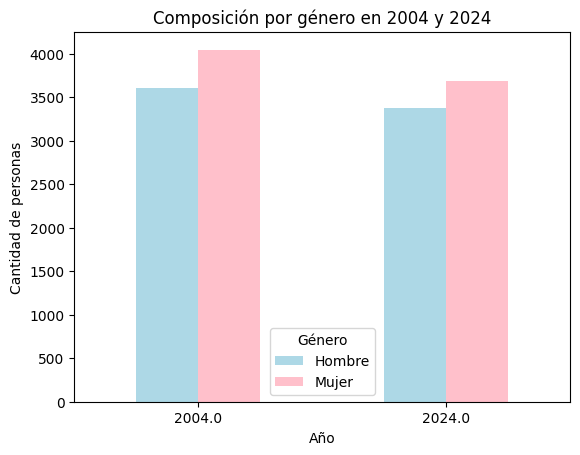

In [14]:
# Grafico de cantidad de hombres y mujeres por año
composicion = base_limpia.groupby(['ano4', 'ch04']).size().unstack(fill_value=0)
composicion.plot(kind ='bar', color=['lightblue', 'pink'])
plt.title('Composición por género en 2004 y 2024')
plt.xlabel('Año')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation = 0)  # Para tener las etiquetas en horizontal
plt.legend(title = 'Género', labels=['Hombre', 'Mujer'])
plt.show()

#### PUNTO 2.D
Realicen una matriz de correlación para 2004 y 2024 con las siguientes variables: CH04, CH06, CH07, CH08, NIVEL ED, ESTADO, CAT_INAC, IPCF. Utilicen alguno de los comandos disponibles en este link o este link para graficar la matriz de correlación. Comenten los resultados

In [15]:
# Lista de variables para al correlacion: no uso las categoricas per se, sino las modificadas
variables_corr =  base_limpia[['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']]

<Axes: >

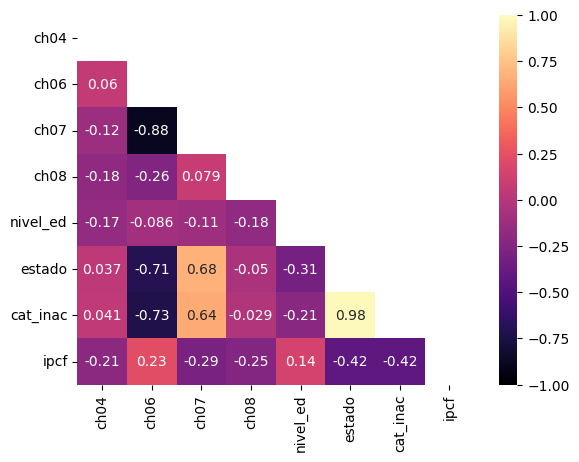

In [16]:
# lo saque del segundo link
matriz_corr = variables_corr.corr()
upp_mat = np.triu(matriz_corr.corr())
sns.heatmap(matriz_corr.corr(), vmin=-1, vmax=+1, annot=True, cmap="magma", mask=upp_mat)

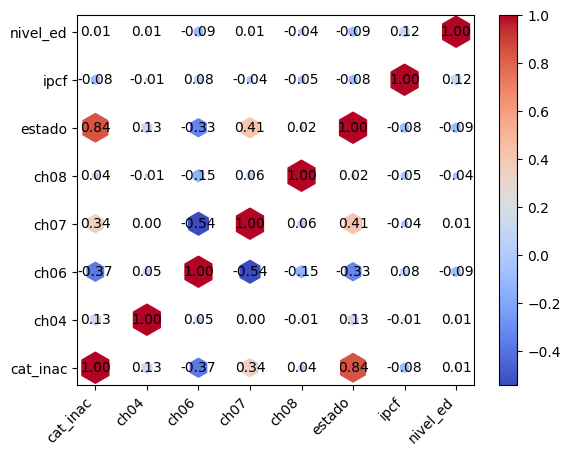

In [17]:
# lo saque del primer link
def heatmap(x, y, size, color):
    fig, ax = plt.subplots()
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]: p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]: p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    scatter = ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        c=color,  # Colores de los puntos
        cmap='coolwarm',  # Mapa de colores
        marker='h' # Usamos hexágonos
    )
    plt.colorbar(scatter, ax=ax)
    
    # Mostrar etiquetas de columnas en los ejes
    ax.set_xticks(list(x_to_num.values()))
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks(list(y_to_num.values()))
    ax.set_yticklabels(y_labels)

        # Agregar los valores de correlación en cada hexágono
    for i in range(len(x)):
        ax.text(
            x=x.map(x_to_num)[i],
            y=y.map(y_to_num)[i],
            s=f"{color[i]:.2f}",  # Mostrar el valor de la correlación con 2 decimales
            color="black",       # Color del texto
            ha='center', va='center')

# Hacer el gráfico
variables_corr = base_limpia[['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']]
corr = variables_corr.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(x=corr['x'], y=corr['y'], size=corr['value'].abs(), color=corr['value'])  # Cambiar aquí color=corr['value']

#### PUNTO 2.E
¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos? ¿Cuál es la media de ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)?

In [18]:
# Cantidad de desocupados
count_desocup = base_limpia[base_limpia['estado'] == 2].shape[0]
print(f"\nCantidad de desocupados: {count_desocup}")

# Cantidad de inactivos
count_inact = base_limpia[base_limpia['estado'] == 3].shape[0]
print(f"Cantidad de inactivos: {count_inact}")

mean_ipcf = base_limpia['ipcf'].mean().round(2)
print(f"\nMedia de ingreso per capita familiar general: {mean_ipcf}")

# Media de ingreso per capita por año
mean_ipcf_ano = base_limpia.groupby('ano4')['ipcf'].mean().round(2)
print("\nMedia de ingreso per capita familiar según año (2004 y 2005):")
print(mean_ipcf_ano)


Cantidad de desocupados: 839
Cantidad de inactivos: 5462

Media de ingreso per capita familiar general: 76978.86

Media de ingreso per capita familiar según año (2004 y 2005):
ano4
2004.0       362.51
2024.0    160071.35
Name: ipcf, dtype: float64


In [19]:
# Crear un diccionario para mapear los valores numéricos a nombres de estado
estado_mapping = {
    1: 'Ocupado',
    2: 'Desocupado',
    3: 'Inactivo',
    4: 'Menor de 10 años',
    0: 'Entrevista no realizada'
}

mean_ipcf_estado = base_limpia.groupby(base_limpia['estado'].map(estado_mapping))['ipcf'].mean().round(2)
print("\nMedia de ingreso per capita familiar segun estado:")
print(mean_ipcf_estado)

mean_ipcf_estado_ano = base_limpia.groupby([base_limpia['estado'].map(estado_mapping), 'ano4'])['ipcf'].mean().round(2)
print("\nMedia de ingreso per capita familiar según estado por año:")
print(mean_ipcf_estado_ano)


Media de ingreso per capita familiar segun estado:
estado
Desocupado                  31655.96
Entrevista no realizada        10.30
Inactivo                    63863.08
Menor de 10 años            41675.20
Ocupado                    106443.40
Name: ipcf, dtype: float64

Media de ingreso per capita familiar según estado por año:
estado                   ano4  
Desocupado               2004.0       224.23
                         2024.0     85019.15
Entrevista no realizada  2004.0        52.53
                         2024.0         0.00
Inactivo                 2004.0       315.89
                         2024.0    130704.60
Menor de 10 años         2004.0       246.26
                         2024.0    104353.66
Ocupado                  2004.0       476.06
                         2024.0    207644.84
Name: ipcf, dtype: float64


In [20]:
# Filtrar por estado 'Menor de 10 años' y año 2004
menor_10_anos_2004 = base_limpia[(base_limpia['estado'] == 4) & (base_limpia['ano4'] == 2004)]
cantidad_menor_10_2004 = menor_10_anos_2004.shape[0]
ingreso_promedio_menor_10_2004 = menor_10_anos_2004['ipcf'].mean().round(2)

# Filtrar por estado 'Menor de 10 años' y año 2024
menor_10_anos_2024 = base_limpia[(base_limpia['estado'] == 4) & (base_limpia['ano4'] == 2024)]
cantidad_menor_10_2024 = menor_10_anos_2024.shape[0]
ingreso_promedio_menor_10_2024 = menor_10_anos_2024['ipcf'].mean().round(2)

print("2004")
print(f"'Menor de 10 años': {cantidad_menor_10_2004}")
print(f"Ingreso promedio: {ingreso_promedio_menor_10_2004}")

print("\n2024")
print(f"'Menor de 10 años': {cantidad_menor_10_2024}")
print(f"Ingreso promedio: {ingreso_promedio_menor_10_2024}")


2004
'Menor de 10 años': 1230
Ingreso promedio: 246.26

2024
'Menor de 10 años': 813
Ingreso promedio: 104353.66


#### PUNTO 3.A
Uno de los grandes problemas de la EPH es la creciente cantidad de hogares que no reportan sus ingresos (ver por ejemplo el siguiente informe). ¿Cuántas personas no respondieron? ¿Cuál es su condición de actividad? 

In [21]:
# Filtrar las personas que no respondieron (h15 == 2)
no_respondieron = base_limpia[base_limpia['h15'] == 2]

# Contar cuántas personas no respondieron
cantidad_no_respondieron = no_respondieron.shape[0]

# Agrupar por 'estado' y contar las personas en cada condición de actividad
condicion_actividad_no_respondieron = no_respondieron['estado'].value_counts()

# Imprimir los resultados
print(f"Cantidad de personas que no respondieron: {cantidad_no_respondieron}")
print(f"\nSu condición de actividad de las personas que no respondieron: {condicion_actividad_no_respondieron}")

# ACA HABRIA QUE PONER QUE 0 == entrevista individual no realizada/no respuesta al cuestionario individual

Cantidad de personas que no respondieron: 51

Su condición de actividad de las personas que no respondieron: estado
0    51
Name: count, dtype: int64


#### PUNTO 3.B
Guarden como una base distinta llamada respondieron las observaciones donde respondieron la pregunta sobre su condición de actividad (ESTADO). 

Las observaciones con ESTADO=0 guárdenlas en una base bajo el nombre norespondieron.

In [22]:
# base con datos que si respondieron a la condicion de actividad
resp_observaciones = base_limpia[base_limpia['estado'] != 0]
resp_observaciones_cant = base_limpia[base_limpia['estado'] != 0].shape[0]

print("La cantidad de personas que respondieron a la pregunta de condicion de actividad son:", resp_observaciones_cant)

# base con datos que no respondieron a la condicion de actividad
no_resp = base_limpia[base_limpia['estado'] == 0]
no_resp_cant = base_limpia[base_limpia['estado'] == 0].shape[0]
print("La cantidad de personas que no respondieron a la pregunta de condicion de actividad son:", no_resp_cant)

La cantidad de personas que respondieron a la pregunta de condicion de actividad son: 14647
La cantidad de personas que no respondieron a la pregunta de condicion de actividad son: 51


#### PUNTO 4.A
Agreguen a la base respondieron una columna llamada PEA (Población Económicamente Activa) que tome 1 si están ocupados o desocupados en ESTADO. 

In [23]:
resp_observaciones = resp_observaciones.assign(PEA = (resp_observaciones['estado'].isin([1, 2])).astype(int))
resp_observaciones

,codusu,ano4,trimestre,nro_hogar,componente,h15,region,mas_500,aglomerado,pondera,...,rdeccfr,gdeccfr,pdeccfr,adeccfr,pondih,pj1_1,pj2_1,pj3_1,idimpp,PEA
245,TQRMNOSUWHLKMUCDEIJAH00855260,2024.0,1,1.0,1,1,1,0,33,1810.0,...,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN,1
246,TQRMNOSUWHLKMUCDEIJAH00855260,2024.0,1,1.0,2,1,1,0,33,1810.0,...,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN,1
247,TQRMNOSUWHLKMUCDEIJAH00855260,2024.0,1,1.0,3,1,1,0,33,1810.0,...,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN,1
255,TQSMNORWVHLLKQCDEIJAH00856914,2024.0,1,1.0,1,1,1,0,33,2368.0,...,9,9.0,NaN,9,3324.0,NaN,NaN,NaN,NaN,1
256,TQRMNOPQQHLOLRCDEIJAH00855133,2024.0,1,1.0,1,1,1,0,33,1223.0,...,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,288171,2004.0,1er. Trimestre,1.0,3,0,Gran Buenos Aires,0,33,1454.0,...,08,08,,09,NaN,0.0,0.0,0.0,00000,0
7643,288405,2004.0,1er. Trimestre,1.0,1,1,Gran Buenos Aires,0,33,1673.0,...,02,02,,02,NaN,0.0,0.0,0.0,00000,1
7644,288405,2004.0,1er. Trimestre,1.0,2,1,Gran Buenos Aires,0,33,1673.0,...,02,02,,02,NaN,0.0,0.0,0.0,00000,1
7645,288405,2004.0,1er. Trimestre,1.0,3,1,Gran Buenos Aires,0,33,1673.0,...,02,02,,02,NaN,0.0,0.0,0.0,00000,0


#### PUNTO 4.B
Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados.

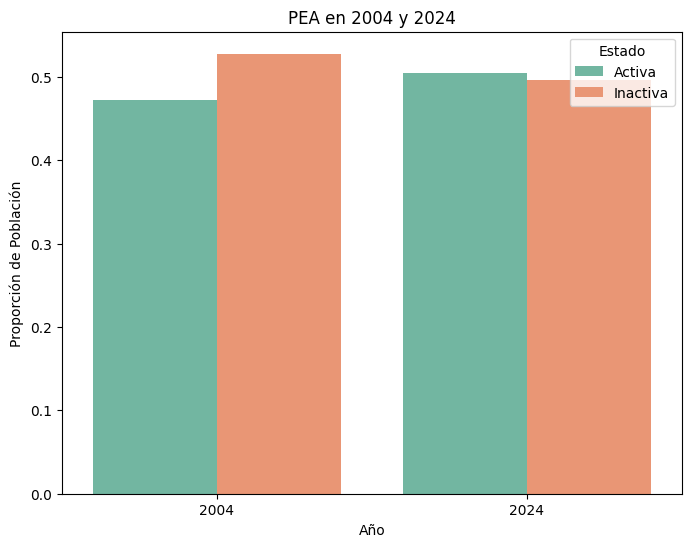

In [24]:
# Contar y calcular las proporciones para cada año
pea_2004_count = resp_observaciones[resp_observaciones['ano4'] == 2004]['PEA'].count()
pea_2004_active = resp_observaciones[resp_observaciones['ano4'] == 2004]['PEA'].mean()
pea_2004_inactive = 1 - pea_2004_active  # Proporción inactiva

pea_2024_count = resp_observaciones[resp_observaciones['ano4'] == 2024]['PEA'].count()
pea_2024_active = resp_observaciones[resp_observaciones['ano4'] == 2024]['PEA'].mean()
pea_2024_inactive = 1 - pea_2024_active  # Proporción inactiva

# Crear un DataFrame para facilitar la visualización
pea_data = pd.DataFrame({
    'Año': [2004, 2004, 2024, 2024],
    'Estado': ['Activa', 'Inactiva', 'Activa', 'Inactiva'],
    'Proporción PEA': [pea_2004_active, pea_2004_inactive, pea_2024_active, pea_2024_inactive]
})

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=pea_data, x='Año', y='Proporción PEA', hue='Estado', palette='Set2')
plt.title('PEA en 2004 y 2024')
plt.xlabel('Año')
plt.ylabel('Proporción de Población')
plt.legend(title='Estado')
plt.show()


#### PUNTO 5.A
Agreguen a la base respondieron una columna llamada PET (Población en Edad para Trabajar) que tome 1 si están la persona tiene entre 15 y 65 años cumplidos.

In [25]:
# creo la nueva columna usando la expresion booleana y luego transformandolo a int
resp_observaciones = resp_observaciones.assign(PET=((resp_observaciones['ch06'] >= 15) & (resp_observaciones['ch06'] <= 65)).astype(int))
print(resp_observaciones)

                             codusu    ano4       trimestre  nro_hogar  \
245   TQRMNOSUWHLKMUCDEIJAH00855260  2024.0               1        1.0   
246   TQRMNOSUWHLKMUCDEIJAH00855260  2024.0               1        1.0   
247   TQRMNOSUWHLKMUCDEIJAH00855260  2024.0               1        1.0   
255   TQSMNORWVHLLKQCDEIJAH00856914  2024.0               1        1.0   
256   TQRMNOPQQHLOLRCDEIJAH00855133  2024.0               1        1.0   
...                             ...     ...             ...        ...   
7642                       288171    2004.0  1er. Trimestre        1.0   
7643                       288405    2004.0  1er. Trimestre        1.0   
7644                       288405    2004.0  1er. Trimestre        1.0   
7645                       288405    2004.0  1er. Trimestre        1.0   
7646                       288405    2004.0  1er. Trimestre        1.0   

      componente  h15             region  mas_500  aglomerado  pondera  ...  \
245            1    1           

#### PUNTO 5.B
Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados y compare PET con PEA.

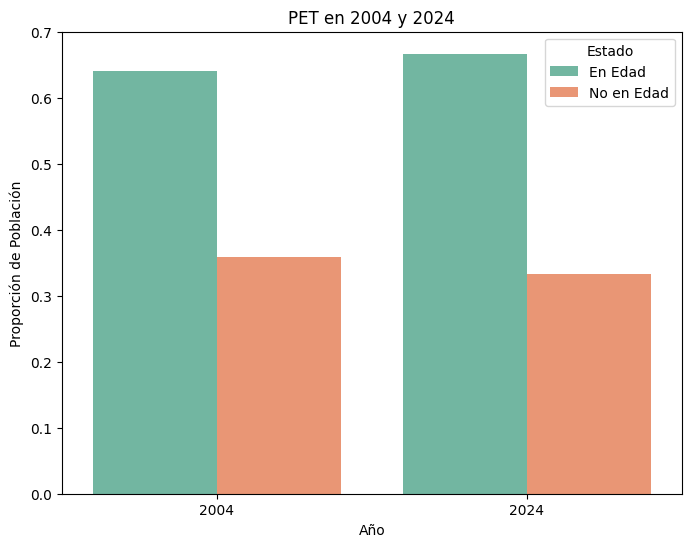

In [26]:
# Calcular las medias para cada año
pet_2004 = resp_observaciones[resp_observaciones['ano4'] == 2004]['PET'].mean()
pet_2004_inactive = 1 - pet_2004  # Proporción no en edad para trabajar

pet_2024 = resp_observaciones[resp_observaciones['ano4'] == 2024]['PET'].mean()
pet_2024_inactive = 1 - pet_2024  # Proporción no en edad para trabajar

# Crear un DataFrame para facilitar la visualización
pet_data = pd.DataFrame({
    'Año': [2004, 2004, 2024, 2024],
    'Estado': ['En Edad', 'No en Edad', 'En Edad', 'No en Edad'],
    'Proporción PET': [pet_2004, pet_2004_inactive, pet_2024, pet_2024_inactive]
})

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=pet_data, x='Año', y='Proporción PET', hue='Estado', palette='Set2')
plt.title('PET en 2004 y 2024')
plt.xlabel('Año')
plt.ylabel('Proporción de Población')
plt.legend(title='Estado')
plt.show()

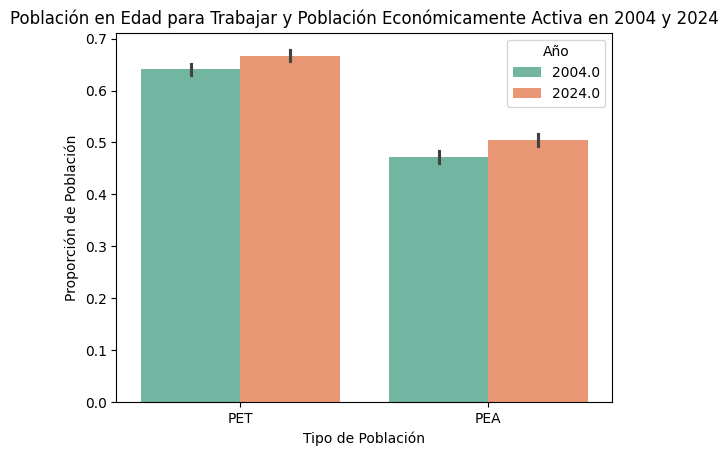

In [27]:
# pongo todos los datos que necesito en un df para comparar PET y PEA
data_long = pd.melt(resp_observaciones, 
                    id_vars='ano4', 
                    value_vars=['PET', 'PEA'],
                    var_name='Población', 
                    value_name='Proporción de Población')

sns.barplot(data = data_long, x = 'Población', y = 'Proporción de Población', hue ='ano4', palette = 'Set2')
plt.title('Población en Edad para Trabajar y Población Económicamente Activa en 2004 y 2024')
plt.xlabel('Tipo de Población')
plt.ylabel('Proporción de Población')
plt.legend(title = 'Año')
plt.show()

#### PUNTO 6. 
Por ultimo, agreguen la base respondieron una columna llamada desocupado que tome 1 si esta desocupada. ¿Cuántas personas están desocupadas en 2004 vs 2024?

In [28]:
resp_observaciones = resp_observaciones.assign(desocupado = (resp_observaciones['estado'].isin([2])).astype(int))
resp_observaciones

,codusu,ano4,trimestre,nro_hogar,componente,h15,region,mas_500,aglomerado,pondera,...,pdeccfr,adeccfr,pondih,pj1_1,pj2_1,pj3_1,idimpp,PEA,PET,desocupado
245,TQRMNOSUWHLKMUCDEIJAH00855260,2024.0,1,1.0,1,1,1,0,33,1810.0,...,NaN,12,0.0,NaN,NaN,NaN,NaN,1,0,0
246,TQRMNOSUWHLKMUCDEIJAH00855260,2024.0,1,1.0,2,1,1,0,33,1810.0,...,NaN,12,0.0,NaN,NaN,NaN,NaN,1,1,0
247,TQRMNOSUWHLKMUCDEIJAH00855260,2024.0,1,1.0,3,1,1,0,33,1810.0,...,NaN,12,0.0,NaN,NaN,NaN,NaN,1,1,0
255,TQSMNORWVHLLKQCDEIJAH00856914,2024.0,1,1.0,1,1,1,0,33,2368.0,...,NaN,9,3324.0,NaN,NaN,NaN,NaN,1,1,0
256,TQRMNOPQQHLOLRCDEIJAH00855133,2024.0,1,1.0,1,1,1,0,33,1223.0,...,NaN,12,0.0,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7642,288171,2004.0,1er. Trimestre,1.0,3,0,Gran Buenos Aires,0,33,1454.0,...,,09,NaN,0.0,0.0,0.0,00000,0,0,0
7643,288405,2004.0,1er. Trimestre,1.0,1,1,Gran Buenos Aires,0,33,1673.0,...,,02,NaN,0.0,0.0,0.0,00000,1,1,0
7644,288405,2004.0,1er. Trimestre,1.0,2,1,Gran Buenos Aires,0,33,1673.0,...,,02,NaN,0.0,0.0,0.0,00000,1,1,0
7645,288405,2004.0,1er. Trimestre,1.0,3,1,Gran Buenos Aires,0,33,1673.0,...,,02,NaN,0.0,0.0,0.0,00000,0,0,0


Cantidad de desocupados en 2004 es de 528
Cantidad de desocupados en 2024 es de 311


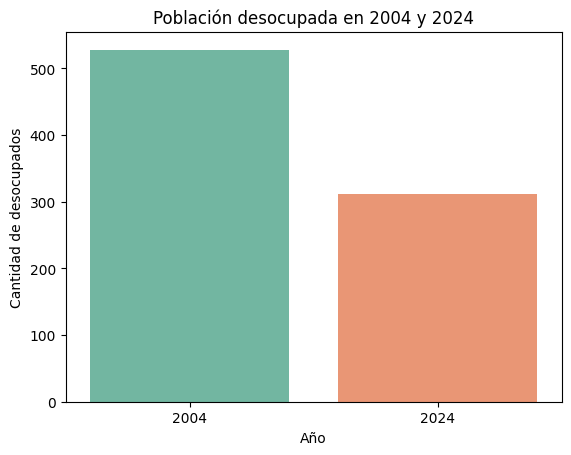

In [29]:
# Contar desocupados donde desocupado = 1 para cada año
desocupado_2004 = resp_observaciones[(resp_observaciones['ano4'] == 2004) & (resp_observaciones['desocupado'] == 1)].count()['desocupado']
print("Cantidad de desocupados en 2004 es de", desocupado_2004)

desocupado_2024 = resp_observaciones[(resp_observaciones['ano4'] == 2024) & (resp_observaciones['desocupado'] == 1)].count()['desocupado']
print("Cantidad de desocupados en 2024 es de", desocupado_2024)

# Crear un DataFrame para facilitar la visualización
desocupado_data = pd.DataFrame({
    'Año': [2004, 2024],
    'Proporción Desocupado': [desocupado_2004, desocupado_2024]
})

# Crear el gráfico de barras
sns.barplot(data=desocupado_data, x='Año', y='Proporción Desocupado', hue='Año', palette='Set2', legend=False)
plt.title('Población desocupada en 2004 y 2024')
plt.xlabel('Año')
plt.ylabel('Cantidad de desocupados')
plt.show()

Cantidad de desocupados en 2004 es de 7109
Cantidad de desocupados en 2024 es de 6699


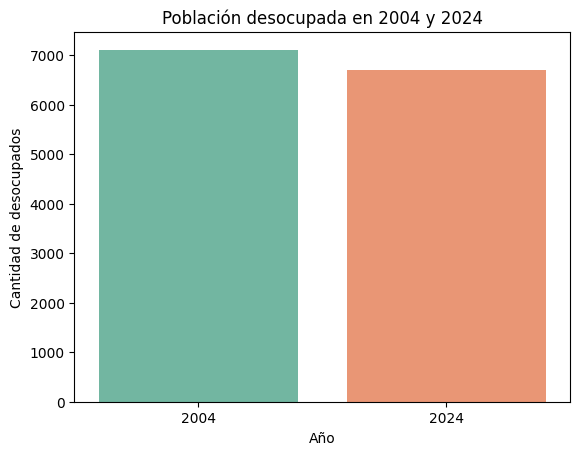

In [30]:
# Contar desocupados donde desocupado = 1 para cada año
desocupado_2004 = resp_observaciones[(resp_observaciones['ano4'] == 2004) & (resp_observaciones['desocupado'] == 0)].count()['desocupado']
print("Cantidad de desocupados en 2004 es de", desocupado_2004)

desocupado_2024 = resp_observaciones[(resp_observaciones['ano4'] == 2024) & (resp_observaciones['desocupado'] == 0)].count()['desocupado']
print("Cantidad de desocupados en 2024 es de", desocupado_2024)

# Crear un DataFrame para facilitar la visualización
desocupado_data = pd.DataFrame({
    'Año': [2004, 2024],
    'Proporción Desocupado': [desocupado_2004, desocupado_2024]
})

# Crear el gráfico de barras
sns.barplot(data=desocupado_data, x='Año', y='Proporción Desocupado', hue='Año', palette='Set2', legend=False)
plt.title('Población desocupada en 2004 y 2024')
plt.xlabel('Año')
plt.ylabel('Cantidad de desocupados')
plt.show()


#### PUNTO 6.A (Opcional) 
Muestre la proporción de desocupados por nivel educativo comparando 2004 vs 2024. ¿Hubo cambios de desocupados por nivel educativo?

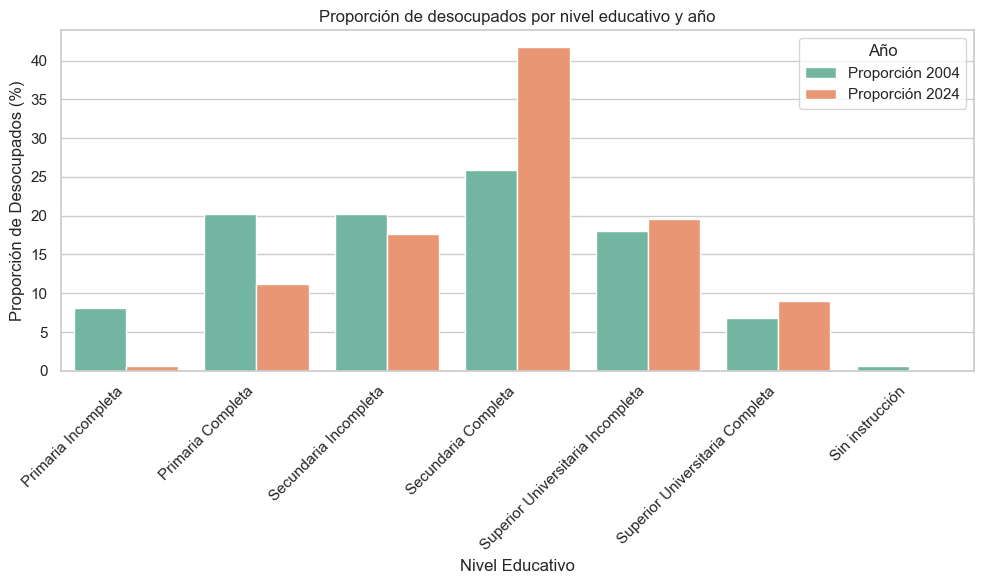

In [31]:
# Filtrar los datos para los años 2004 y 2024
resp_observaciones_2004 = resp_observaciones[resp_observaciones['ano4'] == 2004]
resp_observaciones_2024 = resp_observaciones[resp_observaciones['ano4'] == 2024]

# Calcular la proporción de desocupados por nivel educativo para cada año
proporciones_2004 = (resp_observaciones_2004[resp_observaciones_2004['estado'] == 2]['nivel_ed'].value_counts(normalize=True) * 100).reset_index()
proporciones_2024 = (resp_observaciones_2024[resp_observaciones_2024['estado'] == 2]['nivel_ed'].value_counts(normalize=True) * 100).reset_index()

# Renombrar columnas
proporciones_2004.columns = ['Nivel Educativo', 'Proporción 2004']
proporciones_2024.columns = ['Nivel Educativo', 'Proporción 2024']

# Unir las dos proporciones en un solo DataFrame
proporciones = pd.merge(proporciones_2004, proporciones_2024, on='Nivel Educativo', how='outer').fillna(0)

# Diccionario de niveles educativos
niveles_educativos = {
    1: 'Primaria Incompleta',
    2: 'Primaria Completa',
    3: 'Secundaria Incompleta',
    4: 'Secundaria Completa',
    5: 'Superior Universitaria Incompleta',
    6: 'Superior Universitaria Completa',
    7: 'Sin instrucción',
    9: 'Ns./Nr.'
}

# Reemplazar los valores numéricos por los nombres de los niveles educativos
proporciones['Nivel Educativo'] = proporciones['Nivel Educativo'].replace(niveles_educativos)

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Transformar el DataFrame a formato largo para la visualización
proporciones_long = pd.melt(proporciones, id_vars='Nivel Educativo', 
                             value_vars=['Proporción 2004', 'Proporción 2024'],
                             var_name='Año', value_name='Proporción de Desocupados')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=proporciones_long, x='Nivel Educativo', y='Proporción de Desocupados', hue='Año', palette='Set2')

# Añadir etiquetas y título
plt.title('Proporción de desocupados por nivel educativo y año')
plt.xlabel('Nivel Educativo')
plt.ylabel('Proporción de Desocupados (%)')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización
plt.legend(title='Año')
plt.tight_layout()
plt.show()


#### PUNTO 6.B (Opcional)
Cree una variable categórica de años cumplidos (CH06) agrupada de a 10 años. Muestre proporción de desocupados por edad agrupada comparando 2004 vs 2024. ¿Hubo cambios de desocupados por edad?

  Edad agrupada  Proporción 2004  Proporción 2024
0         10-19        17.234848        11.575563
1         20-29        35.984848        36.655949
2         30-39        16.287879        13.826367
3         40-49        10.037879        19.292605
4         50-59        12.500000        10.610932
5         60-69         6.250000         6.752412
6         70-79         1.515152         1.286174
7         80-89         0.189394         0.000000


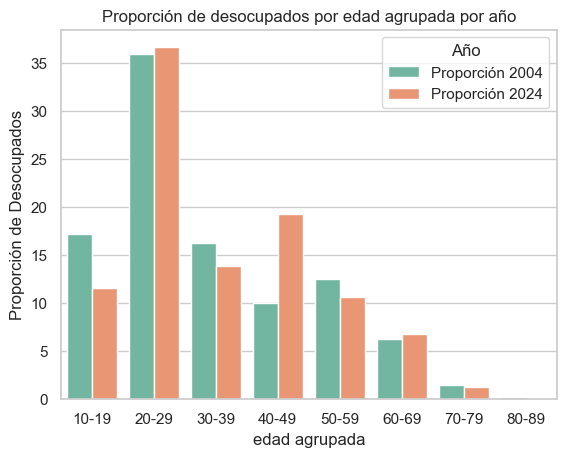

In [32]:
# Definir la función para clasificar la edad en intervalos de 10 años
def clasificar_edad(edad):
    if edad < 10:
        return '0-9'
    elif edad < 20:
        return '10-19'
    elif edad < 30:
        return '20-29'
    elif edad < 40:
        return '30-39'
    elif edad < 50:
        return '40-49'
    elif edad < 60:
        return '50-59'
    elif edad < 70:
        return '60-69'
    elif edad < 80:
        return '70-79'
    elif edad < 90:
        return '80-89'
    elif edad < 100:
        return '90-99'
    else:
        return '100+'

# Aplico la función a la columna de edad
resp_observaciones['edad_agrupada'] = resp_observaciones['ch06'].apply(clasificar_edad)

# Filtrar los datos para los años 2004 y 2024
resp_observaciones_2004 = resp_observaciones[resp_observaciones['ano4'] == 2004]
resp_observaciones_2024 = resp_observaciones[resp_observaciones['ano4'] == 2024]
# Calcular la proporción de desocupados por nivel educativo
proporciones_2004 = (resp_observaciones_2004[resp_observaciones_2004['estado'] == 2]['edad_agrupada'].value_counts(normalize=True) * 100).reset_index()
proporciones_2024 = (resp_observaciones_2024[resp_observaciones_2024['estado'] == 2]['edad_agrupada'].value_counts(normalize=True) * 100).reset_index()
# Renombrar columnas
proporciones_2004.columns = ['Edad agrupada', 'Proporción 2004']
proporciones_2024.columns = ['Edad agrupada', 'Proporción 2024']
# Unir las dos proporciones en un solo DataFrame
proporciones = pd.merge(proporciones_2004, proporciones_2024, on='Edad agrupada', how='outer').fillna(0)
print(proporciones)

# Transformar el DataFrame a formato largo para la visualización
proporciones_long = pd.melt(proporciones, id_vars='Edad agrupada', 
                             value_vars=['Proporción 2004', 'Proporción 2024'],
                             var_name = 'Año', value_name='Proporción de Desocupados')

# Crear el gráfico de barras
sns.barplot(data=proporciones_long, x = 'Edad agrupada', y='Proporción de Desocupados', hue='Año', palette='Set2')
plt.title('Proporción de desocupados por edad agrupada por año')
plt.xlabel('edad agrupada')
plt.ylabel('Proporción de Desocupados')
plt.legend(title = 'Año')
plt.show()

#### PUNTO 7 (Opcional) 
Dos tasas de desocupación: calcule la tasa de desocupación para Tucumán en 2004 y 2024 siguiendo la definición del INDEC. En economía laboral, muchas veces se argumenta que participar del mercado laboral (PEA=1) es una decisión endógena de los individuos y no quisiéramos que el indicador de la tasa de desocupación varíe por dicha decisión. Calcule la tasa de desocupación alternativa como el porcentaje de desocupados respecto de la PET. Presente en una tabla o gráfico la tasa de desocupación del INDEC y de economía laboral para 2004 y 2024 y comente los resultados. ¿Cuáles son las ventajas y desventajas de dichas mediciones?

## PARTE 2: CLASIFICACION
El objetivo de esta parte del trabajo es intentar predecir si una persona está desocupada o no utilizando distintas variables de características individuales

#### PUNTO 1
Para cada año, partan la base respondieron en una base de prueba (test) y una de entrenamiento (train) utilizando el comando train_test_split. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (random state instance) debe ser 101. Establezca a desocupado como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables serán las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [33]:
base_clasificacion = resp_observaciones[['ano4',"ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado", "cat_inac", "componente", "h15", "mas_500", "aglomerado", "ch03"]]

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split

def preparar_datos(base, ano):
    """
    Prepara los conjuntos de entrenamiento y prueba para un año específico.
    
    Args:
        base: DataFrame original.
        ano: Año para filtrar los datos.

    Returns:
        X_train, y_train, X_test, y_test: Conjuntos de datos preparados.
    """
    # Filtrar los datos por año
    datos_ano = base[base['ano4'] == ano]
    
    # Dividir los datos en conjuntos de entrenamiento y prueba
    train, test = train_test_split(datos_ano, test_size=0.3, random_state=101)

    # Separar características y variable objetivo para entrenamiento
    X_train = train.drop(columns=['estado', 'ano4'])
    y_train = (train['estado'] == 2).astype(int)

    # Agregar columna de intercepto
    X_train = X_train.assign(intercept=1)

    # Separar características y variable objetivo para prueba
    X_test = test.drop(columns=['estado', 'ano4'])
    y_test = (test['estado'] == 2).astype(int)

    # Agregar columna de intercepto
    X_test = X_test.assign(intercept=1)

    return X_train, y_train, X_test, y_test

# Preparar datos para 2004 y 2024
X_train_2004, y_train_2004, X_test_2004, y_test_2004 = preparar_datos(base_clasificacion, 2004)
X_train_2024, y_train_2024, X_test_2024, y_test_2024 = preparar_datos(base_clasificacion, 2024)




#### PUNTO 2. 
Implementen los siguientes métodos reportando luego la matriz de confusión, la curva ROC, los valores de AUC y de Accuracy de cada uno:

### 2004

AUC 2004: 0.8692
Confusion Matrix 2004:
[[2128    5]
 [ 158    1]]
Thresholds: [           inf 6.11826056e-01 5.96097635e-01 ... 1.52627450e-30
 1.25938433e-30 1.07442528e-30]
FPR: [0.00000000e+00 0.00000000e+00 4.68823254e-04 ... 9.99062353e-01
 9.99531177e-01 1.00000000e+00]
TPR: [0.         0.00628931 0.00628931 ... 1.         1.         1.        ]


C:\Users\tizip\anaconda3\envs\Cienciadedatos\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


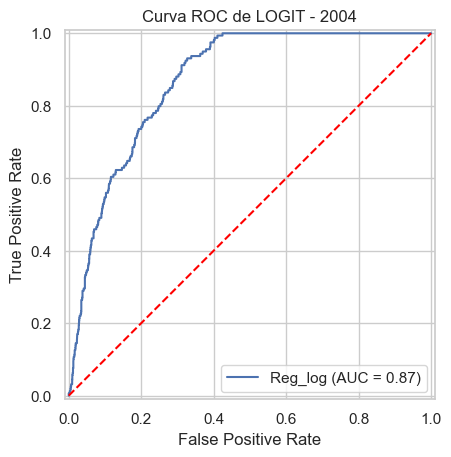

Accuracy 2004: 0.928883


In [ ]:
# REGRESION LOGISTICA PARA 2004

log_reg_2004 = LogisticRegression(penalty = None).fit(X_train_2004, y_train_2004)
y_test_pred_score_2004 = log_reg_2004.predict_proba(X_test_2004)[:,1]
y_test_pred_2004 = log_reg_2004.predict(X_test_2004)

# valores de AUC
auc_2004 = roc_auc_score(y_test_2004, y_test_pred_score_2004)
print('AUC 2004: %.4f' % auc_2004)

#matriz de confusion
matriz_confusion_2004 = confusion_matrix(y_test_2004, y_test_pred_2004)
print('Confusion Matrix 2004:')
print(matriz_confusion_2004) 

#curvas ROC
fpr_2004, tpr_2004, thresholds_2004 = roc_curve(y_test_2004, y_test_pred_score_2004, drop_intermediate=False)  # drop_intermediate=False nos da mas thresholds ('c') para probar
print('Thresholds:', thresholds_2004)
print('FPR:', fpr_2004)
print('TPR:', tpr_2004)

#grafico
display_2004 = RocCurveDisplay(fpr = fpr_2004, tpr = tpr_2004, roc_auc = auc_2004, estimator_name = 'Reg_log')
display_2004.plot()  
plt.title("Curva ROC de LOGIT - 2004")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

#accuracy
accuracy_2004 = accuracy_score(y_test_2004, y_test_pred_2004)
print('Accuracy 2004: %f' % accuracy_2004)

Número de características: 12
Número de clases: 2
[[2129    4]
 [ 158    1]]
AUC 2004: 0.8534
Thresholds: [           inf 7.04269000e-01 6.65101967e-01 ... 3.52009517e-04
 2.74526915e-04 2.51661944e-04]
FPR: [0.00000000e+00 4.68823254e-04 9.37646507e-04 ... 9.99062353e-01
 9.99531177e-01 1.00000000e+00]
TPR: [0. 0. 0. ... 1. 1. 1.]


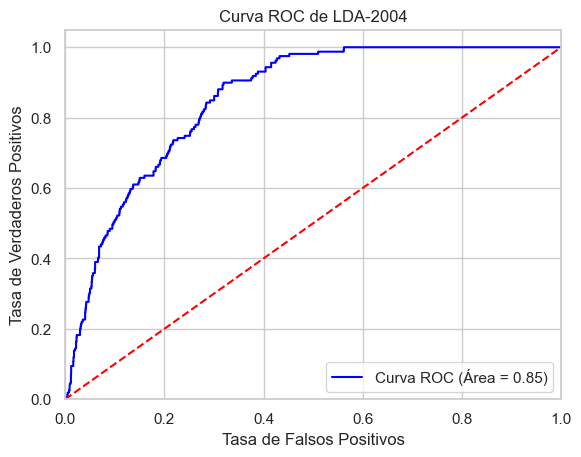

La accuracy del modelo es: 0.93


In [ ]:
# ANALISIS DISCRIMINANTE LINEAL PARA 2004

# vemos la cantidad de caracteristicas y clases para saber la cantidad de componentes en la proxima linea de codigo
n_features_2004 = X_train_2004.shape[1]
n_classes_2004 = len(set(y_train_2004))
print("Número de características:", n_features_2004)
print("Número de clases:", n_classes_2004)

lda_2004 = LinearDiscriminantAnalysis(n_components = 1) # Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.
lda_2004 = lda_2004.fit(X_train_2004, y_train_2004) 

#predigo con el modelo sobre el X test
y_test_pred_lda_2004 = lda_2004.predict(X_test_2004)
y_test_pred_score_lda_2004 = lda_2004.predict_proba(X_test_2004)[:, 1]

# Calcular la matriz de confusión
print(confusion_matrix(y_test_2004, y_test_pred_lda_2004))

#valor auc
auc_lda_2004 = roc_auc_score(y_test_2004, y_test_pred_score_lda_2004)
print('AUC 2004: %.4f' % auc_lda_2004)

# curva ROC
fpr_lda_2004, tpr_lda_2004, thresholds_lda_2004 = roc_curve(y_test_2004, y_test_pred_score_lda_2004, drop_intermediate=False)
print('Thresholds:', thresholds_lda_2004)
print('FPR:', fpr_lda_2004)
print('TPR:', tpr_lda_2004)

# Grafico
plt.figure()
plt.plot(fpr_lda_2004, tpr_lda_2004, color='blue', label='Curva ROC (Área = %0.2f)' % auc_lda_2004)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC de LDA-2004')
plt.legend(loc='lower right')
plt.show()

# accuracy
accuracy_lda_2004 = accuracy_score(y_test_2004, y_test_pred_lda_2004)
print("La accuracy del modelo es: %.2f" %accuracy_lda_2004)

[[2068   65]
 [ 130   29]]
AUC 2004: 0.7040
Thresholds: [       inf 1.         0.66666667 0.33333333 0.        ]
FPR: [0.         0.00281294 0.03047351 0.12798875 1.        ]
TPR: [0.         0.03144654 0.18238994 0.52830189 1.        ]


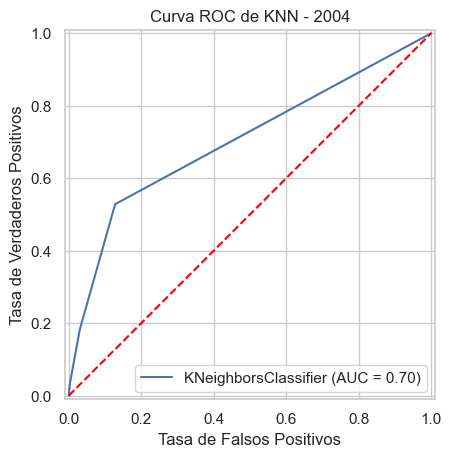

La accuracy del modelo es: 0.915


In [ ]:
# KNN PARA 2004

knn_2004 = KNeighborsClassifier(n_neighbors = 3)
knn_2004.fit(X_train_2004, y_train_2004)

#matriz de confusion
# Predecir las etiquetas de la clase para el conjunto de prueba
y_test_pred_knn_2004 = knn_2004.predict(X_test_2004) 
# Calcular la matriz de confusión
print(confusion_matrix(y_test_2004, y_test_pred_knn_2004))

# Calcular las probabilidades de pertenencia a la clase positiva
y_scores_knn_2004 = knn_2004.predict_proba(X_test_2004)[:, 1]

#valor auc
auc_knn_2004 = roc_auc_score(y_test_2004, y_scores_knn_2004)
print('AUC 2004: %.4f' % auc_knn_2004)

# Calcular la curva ROC
fpr_knn_2004, tpr_knn_2004, thresholds_knn_2004 = roc_curve(y_test_2004, y_scores_knn_2004)
print('Thresholds:', thresholds_knn_2004)
print('FPR:', fpr_knn_2004)
print('TPR:', tpr_knn_2004)

# Graficar la curva ROC
display_knn_2004 = RocCurveDisplay(fpr = fpr_knn_2004, tpr = tpr_knn_2004, roc_auc = auc_knn_2004, estimator_name = 'KNeighborsClassifier')
display_knn_2004.plot()
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.title('Curva ROC de KNN - 2004')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()

# acuuracy
accuracy_knn_2004 = accuracy_score(y_test_2004, y_test_pred_knn_2004)
print("La accuracy del modelo es: %.3f" %accuracy_knn_2004)  

[[1224  909]
 [   0  159]]
AUC NB: 0.79


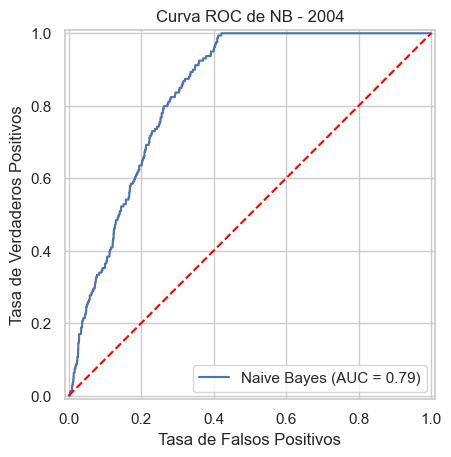

La accuracy del modelo es: 0.603


In [ ]:
# NAIVE BAYES PARA 2004

nb_2004 = GaussianNB() 
nb_2004.fit(X_train_2004, y_train_2004)

#predigo con el modelo de naive bayes
y_pred_nb_2004= nb_2004.predict(X_test_2004) 
y_test_pred_score_nb_2004 = nb_2004.predict_proba(X_test_2004)[:, 1]

# Matriz de CONFUSION
conf_mat5 = confusion_matrix(y_test_2004, y_pred_nb_2004)
print(conf_mat5) 

# AUC 
auc_nb_2004 = roc_auc_score(y_test_2004, y_pred_nb_2004)
print('AUC NB: %.2f' % auc_nb_2004)

# CURVA ROC
fpr_nb_2004, tpr_nb_2004, thresholds_nb_2004 = roc_curve(y_test_2004, y_test_pred_score_nb_2004)

#grafico
display_nb_2004 = RocCurveDisplay(fpr=fpr_nb_2004, tpr=tpr_nb_2004, roc_auc=auc_nb_2004, estimator_name='Naive Bayes')
display_nb_2004.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Curva ROC de NB - 2004')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()

# acuuracy
accuracy_nb_2004 = accuracy_score(y_test_2004, y_pred_nb_2004)
print("La accuracy del modelo es: %.3f" %accuracy_nb_2004)

### 2024

AUC 2024: 0.8638
Confusion Matrix 2024:
[[1995    1]
 [ 107    0]]
Thresholds: [           inf 5.07236243e-01 4.53974761e-01 ... 1.59790176e-22
 1.45774435e-22 7.60783008e-23]
FPR: [0.00000000e+00 5.01002004e-04 1.00200401e-03 ... 9.98997996e-01
 9.99498998e-01 1.00000000e+00]
TPR: [0. 0. 0. ... 1. 1. 1.]


/opt/anaconda3/envs/datos/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


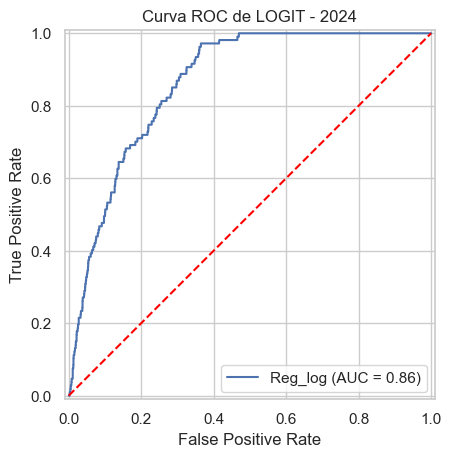

Accuracy 2024: 0.948645


In [39]:
# REGREION LOGISTICA PARA 2024

log_reg_2024 = LogisticRegression(penalty = None).fit(X_train_2024, y_train_2024)
y_test_pred_score_2024 = log_reg_2024.predict_proba(X_test_2024)[:,1]
y_test_pred_2024 = log_reg_2024.predict(X_test_2024)

# valor auc
auc_2024 = roc_auc_score(y_test_2024, y_test_pred_score_2024)
print('AUC 2024: %.4f' % auc_2024)

#matriz de confusion
matriz_confusion_2024 = confusion_matrix(y_test_2024, y_test_pred_2024)
print('Confusion Matrix 2024:')
print(matriz_confusion_2024) 

#curva roc
fpr_2024, tpr_2024, thresholds_2024 = roc_curve(y_test_2024, y_test_pred_score_2024, drop_intermediate=False)  # drop_intermediate=False nos da mas thresholds ('c') para probar
print('Thresholds:', thresholds_2024)
print('FPR:', fpr_2024)
print('TPR:', tpr_2024)

#grafico
display_2024 = RocCurveDisplay(fpr = fpr_2024, tpr = tpr_2024, roc_auc = auc_2024, estimator_name = 'Reg_log')
display_2024.plot()  
plt.title("Curva ROC de LOGIT - 2024")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

# accuracy: (tp + tn) / (p + n)
accuracy_2024 = accuracy_score(y_test_2024, y_test_pred_2024)
print('Accuracy 2024: %f' % accuracy_2024)

Número de características: 12
Número de clases: 2
[[1994    2]
 [ 107    0]]
AUC 2024: 0.8375
Thresholds: [           inf 5.59997885e-01 5.19191322e-01 ... 2.40450160e-04
 2.36919712e-04 2.19324353e-04]
FPR: [0.00000000e+00 5.01002004e-04 1.00200401e-03 ... 9.98997996e-01
 9.99498998e-01 1.00000000e+00]
TPR: [0. 0. 0. ... 1. 1. 1.]


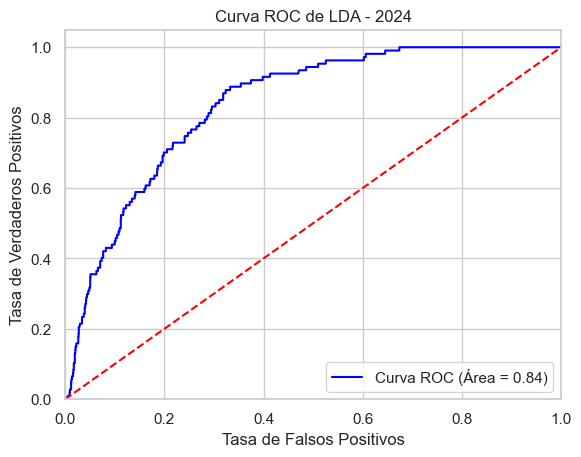

La accuracy del modelo es: 0.95


In [ ]:
# ANALISIS DISCRIMINANTE LINEAL PARA 2024

# vemos la cantidad de caracteristicas y clases para saber la cantidad de componentes en la proxima linea de codigo
n_features_2024 = X_train_2024.shape[1]
n_classes_2024 = len(set(y_train_2024))
print("Número de características:", n_features_2024)
print("Número de clases:", n_classes_2024)

lda_2024 = LinearDiscriminantAnalysis(n_components = 1) # Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.
lda_2024 = lda_2024.fit(X_train_2024, y_train_2024) 

#predigo con el modelo sobre el X test
y_test_pred_lda_2024 = lda_2024.predict(X_test_2024)
y_test_pred_score_lda_2024 = lda_2024.predict_proba(X_test_2024)[:, 1]

# Calcular la matriz de confusión
print(confusion_matrix(y_test_2024, y_test_pred_lda_2024))

#valor auc
auc_lda_2024 = roc_auc_score(y_test_2024, y_test_pred_score_lda_2024)
print('AUC 2024: %.4f' % auc_lda_2024)

# curva ROC
fpr_lda_2024, tpr_lda_2024, thresholds_lda_2024 = roc_curve(y_test_2024, y_test_pred_score_lda_2024, drop_intermediate=False)
print('Thresholds:', thresholds_lda_2024)
print('FPR:', fpr_lda_2024)
print('TPR:', tpr_lda_2024)

# Grafico
plt.figure()
plt.plot(fpr_lda_2024, tpr_lda_2024, color='blue', label='Curva ROC (Área = %0.2f)' % auc_lda_2024)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC de LDA - 2024')
plt.legend(loc='lower right')
plt.show()

# accuracy
accuracy_lda_2024 = accuracy_score(y_test_2024, y_test_pred_lda_2024)
print("La accuracy del modelo es: %.2f" %accuracy_lda_2024)

[[1971   25]
 [ 100    7]]
AUC 2024: 0.6537
Thresholds: [       inf 1.         0.66666667 0.33333333 0.        ]
FPR: [0.         0.00300601 0.01252505 0.08567134 1.        ]
TPR: [0.         0.         0.06542056 0.39252336 1.        ]


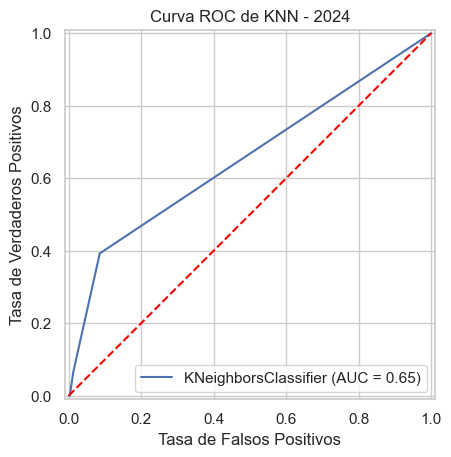

La accuracy del modelo es: 0.941


In [ ]:
# KNN PARA 2024

knn_2024 = KNeighborsClassifier(n_neighbors=3)
knn_2024.fit(X_train_2024, y_train_2024)

#matriz de confusion
# Predecir las etiquetas de la clase para el conjunto de prueba
y_test_pred_knn_2024 = knn_2024.predict(X_test_2024) 
# Calcular la matriz de confusión
print(confusion_matrix(y_test_2024, y_test_pred_knn_2024))

# Calcular las probabilidades de pertenencia a la clase positiva
y_scores_knn_2024 = knn_2024.predict_proba(X_test_2024)[:, 1]

#valor auc
auc_knn_2024 = roc_auc_score(y_test_2024, y_scores_knn_2024)
print('AUC 2024: %.4f' % auc_knn_2024)

# Calcular la curva ROC
fpr_knn_2024, tpr_knn_2024, thresholds_knn_2024 = roc_curve(y_test_2024, y_scores_knn_2024)
print('Thresholds:', thresholds_knn_2024)
print('FPR:', fpr_knn_2024)
print('TPR:', tpr_knn_2024)

# Graficar la curva ROC
display_knn_2024 = RocCurveDisplay(fpr = fpr_knn_2024, tpr = tpr_knn_2024, roc_auc = auc_knn_2024, estimator_name = 'KNeighborsClassifier')
display_knn_2024.plot()
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.title('Curva ROC de KNN - 2024')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()

# acuuracy
accuracy_knn_2024 = accuracy_score(y_test_2024, y_test_pred_knn_2024)
print("La accuracy del modelo es: %.3f" %accuracy_knn_2024)   

[[1039  957]
 [   0  107]]
AUC NB: 0.76


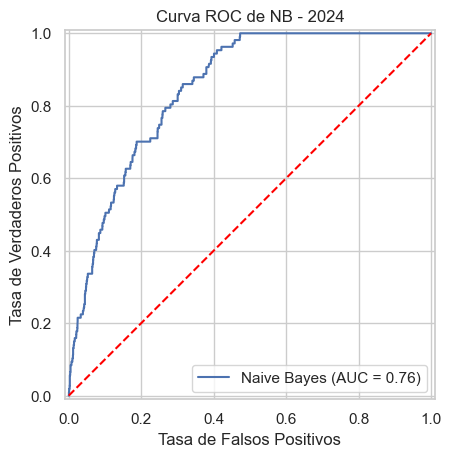

La accuracy del modelo es: 0.545


In [ ]:
# NAIVE BAYES PARA 2024

nb_2024 = GaussianNB() 
nb_2024.fit(X_train_2024, y_train_2024)

#predigo con el modelo de naive bayes
y_pred_nb_2024= nb_2024.predict(X_test_2024) 
y_test_pred_score_nb_2024 = nb_2024.predict_proba(X_test_2024)[:, 1]

# Matriz de CONFUSION
conf_mat4 = confusion_matrix(y_test_2024, y_pred_nb_2024)
print(conf_mat4) 

# AUC 
auc_nb_2024 = roc_auc_score(y_test_2024, y_pred_nb_2024)
print('AUC NB: %.2f' % auc_nb_2024)

# CURVA ROC
fpr_nb_2024, tpr_nb_2024, thresholds_nb_2024 = roc_curve(y_test_2024, y_test_pred_score_nb_2024)

#grafico
display_nb_2024 = RocCurveDisplay(fpr=fpr_nb_2024, tpr=tpr_nb_2024, roc_auc=auc_nb_2024, estimator_name='Naive Bayes')
display_nb_2024.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Curva ROC de NB - 2024')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()

# acuuracy
accuracy_nb_2024 = accuracy_score(y_test_2024, y_pred_nb_2024)
print("La accuracy del modelo es: %.3f" %accuracy_nb_2024)

#### PUNTO 3
Compare los resultados de 2004 versus 2024. ¿Cuál de los métodos predice mejor en cada año? Justifiquen detalladamente utilizando las medidas de precisión que conocen.

#### PUNTO 4
Con el método que seleccionaron, predigan qué personas son desocupadas dentro de la base norespondieron. ¿Qué proporción de las personas que no respondieron pudieron identificar como desocupadas?